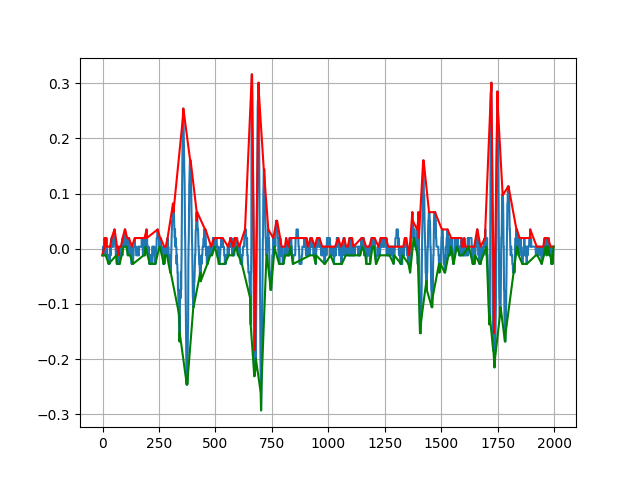

In [55]:
from numpy import array, sign, zeros, sin, cosh
from scipy.interpolate import interp1d
from matplotlib.pyplot import plot,show,grid
%matplotlib widget

with open("Print_13_v2_PCG_RV.txt", "r") as file:
    text_file = file.readlines()
    text_file = text_file[2:]
    # a = [float(x.replace("\n", "").split()[0]) for x in text_file]
    s = array([float(x.replace("\n", "").split()[1]) for x in text_file])
        
                
# s = array([1,4,3,5,3,2,4,3,4,5,4,3,2,5,6,7,8,7,8]) #This is your noisy vector of values.

q_u = zeros(s.shape)
q_l = zeros(s.shape)

#Prepend the first value of (s) to the interpolating values. This forces the model to use the same starting point for both the upper and lower envelope models.

u_x = [0,]
u_y = [s[0],]

l_x = [0,]
l_y = [s[0],]

#Detect peaks and troughs and mark their location in u_x,u_y,l_x,l_y respectively.

for k in range(4,len(s)-3):
    if (sign(s[k]-s[k-4])==1) and (sign(s[k]-s[k+3])==1):
        u_x.append(k)
        u_y.append(s[k])

    if (sign(s[k]-s[k-4])==-1) and ((sign(s[k]-s[k+3]))==-1):
        l_x.append(k)
        l_y.append(s[k])

#Append the last value of (s) to the interpolating values. This forces the model to use the same ending point for both the upper and lower envelope models.

u_x.append(len(s)-1)
u_y.append(s[-1])

l_x.append(len(s)-1)
l_y.append(s[-1])

#Fit suitable models to the data. Here I am using cubic splines, similarly to the MATLAB example given in the question.

# u_p = [s[0],]
        
# for k, l in enumerate(u_x[1:]):
#     m = u_x[k] - u_x[k-1]
#     n = u_y[k] - u_y[k-1] 
#     for o in range(m):
#         u_p.append(u_y[k]-n*(o+1)/m)
 
# print(len(u_p))
    

u_p = interp1d(u_x,u_y, kind = 'slinear',bounds_error = False, fill_value=0.0)
l_p = interp1d(l_x,l_y,kind = 'slinear',bounds_error = False, fill_value=0.0)

#Evaluate each model over the domain of (s)
for k in range(0,len(s)):
    q_u[k] = u_p(k)
    q_l[k] = l_p(k)

#Plot everything
plot(s);plot(q_u,'r');plot(q_l,'g');grid(True);show()